# Ejercicio 8

El archivo `semillas.csv` contiene información de granos que pertenecen a tres variedades diferentes de trigo. Entrene una neurona no lineal para determinar si una semilla es de “TIPO 2” o no. Divida el 60% de los ejemplos para entrenar y el 40% para realizar el testeo. Antes de entrenar, normalice todos los atributos numéricos aplicando media y desvío.
Realice los siguientes experimentos con el fin de analizar cómo distintos hiperparámetros afectan la
convergencia y el desempeño del modelo:

In [2]:
import pandas as pd
import numpy as np
from ClassNeuronaGral import NeuronaGradiente
from sklearn.preprocessing import StandardScaler


DATA_PATH='./Data/'

data=pd.read_csv(DATA_PATH+'semillas.csv')
data['Clase']=(data['Clase']=='Tipo2')*1
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])


train_data = data.sample(frac=0.6, random_state=42)
test_data = data.drop(train_data.index)

X_train = np.array(train_data.drop(columns=['Clase']))
T_train = np.array(train_data['Clase'])
X_test = np.array(test_data.drop(columns=['Clase']))
T_test = np.array(test_data['Clase'])



## Inciso a
Lleve a cabo 20 experimentos, utilizando la función sigmoide, variando la tasa de aprendizaje desde α = 0.04, incrementando en pasos de 0.04 (es decir, α = 0.04, 0.08, ..., hasta 0.80). En cada experimento, registre:

Curva de error (error por iteración), curva de accuracy (precisión por iteración), cantidad total de
iteraciones realizadas, la iteración en la que se alcanzó el 100% de accuracy.

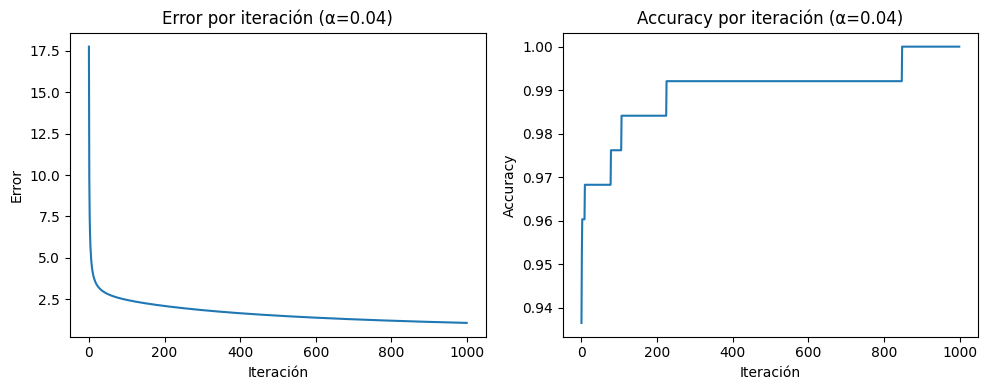

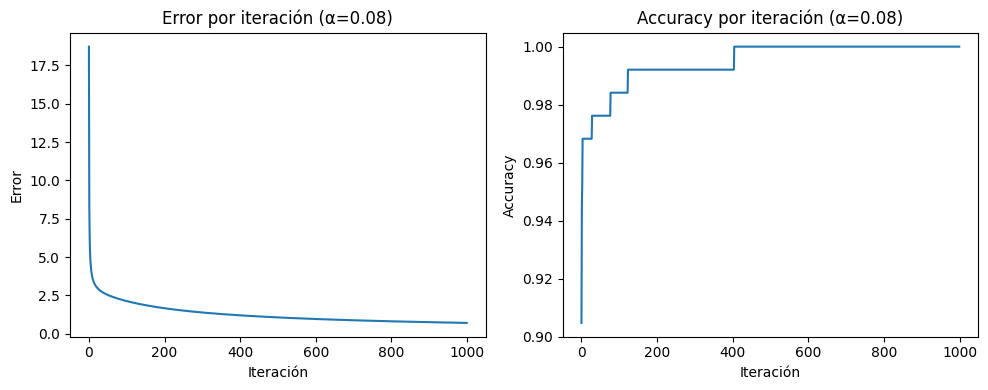

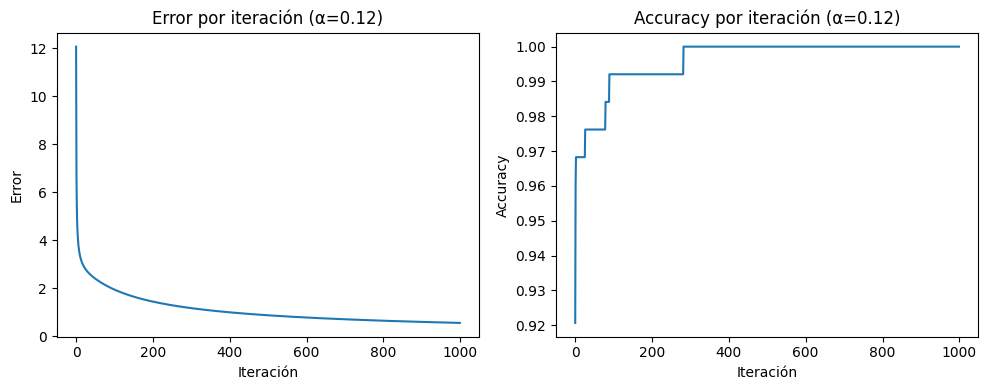

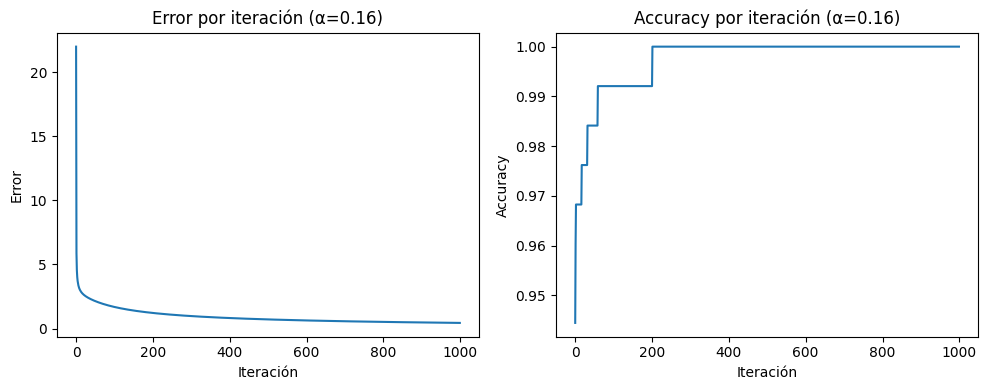

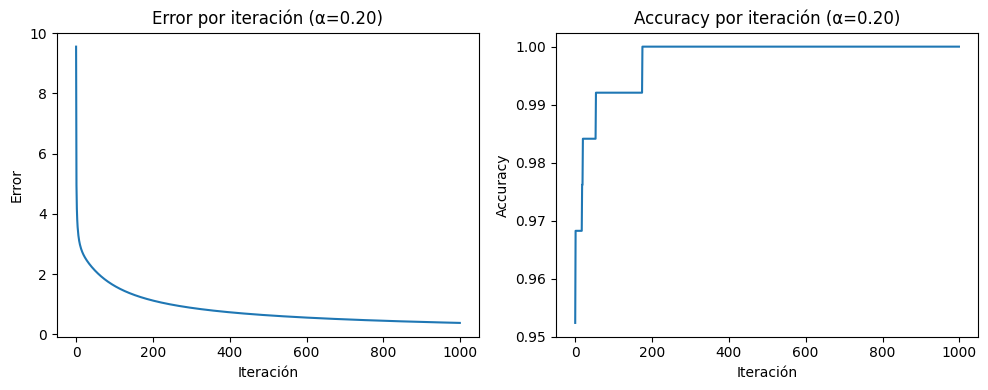

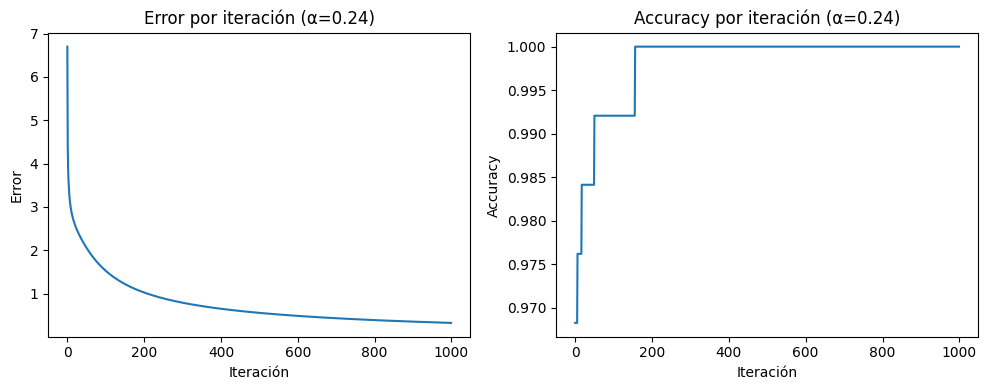

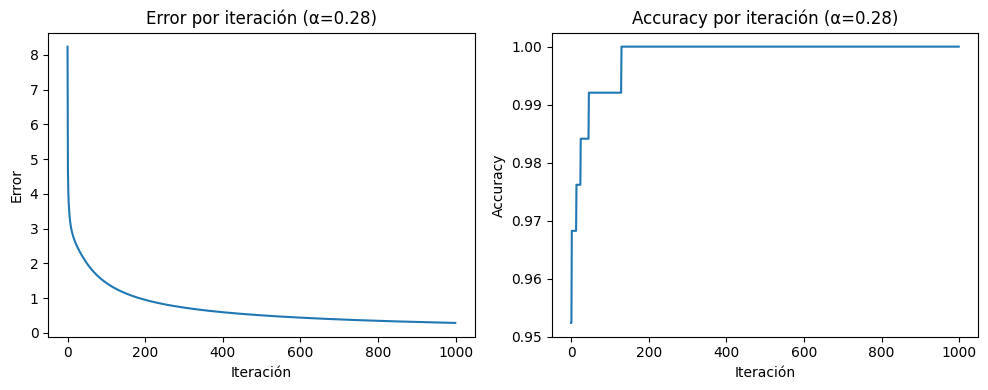

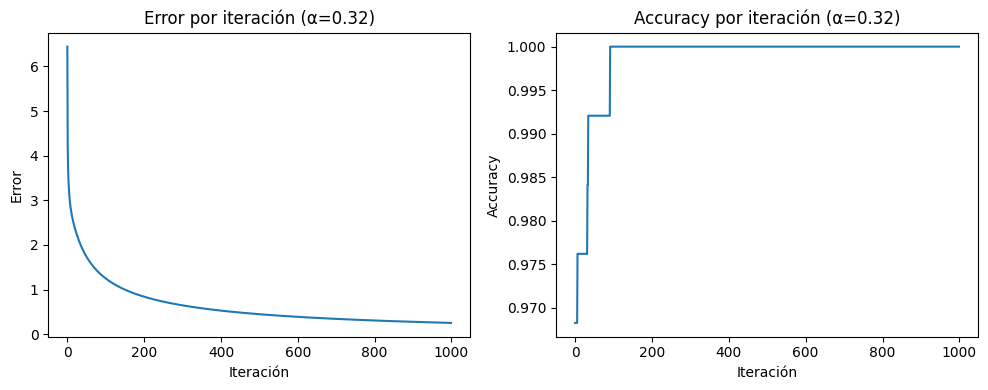

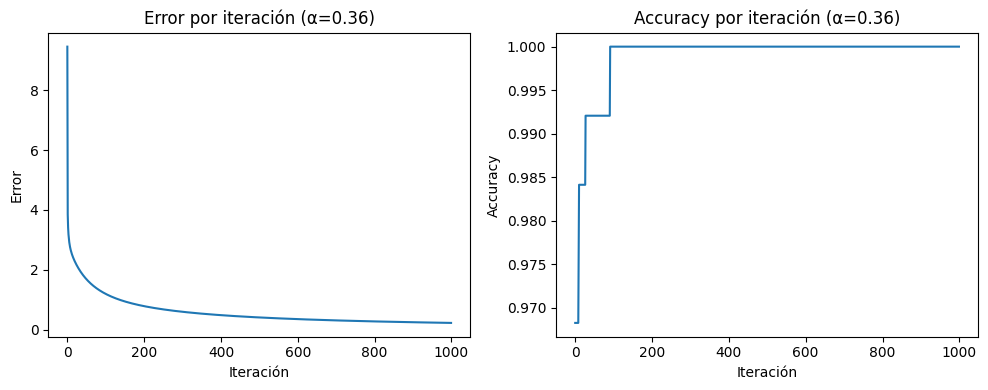

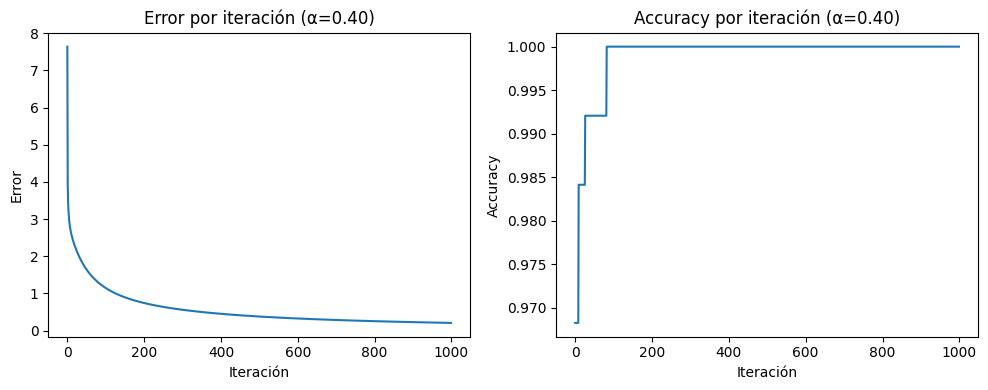

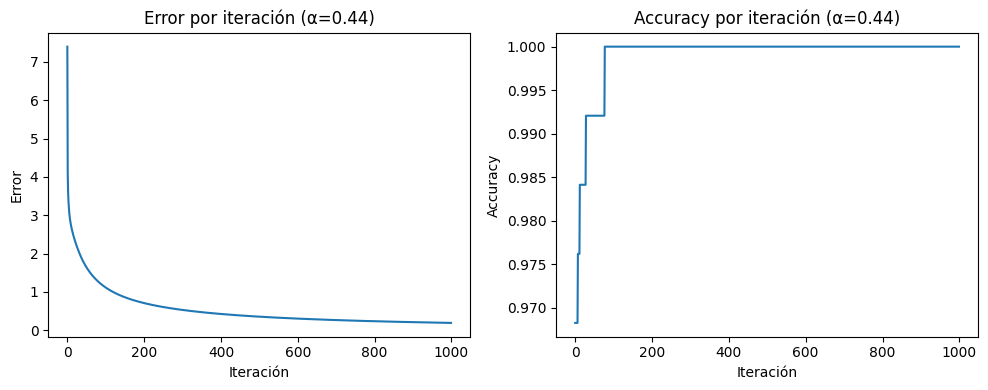

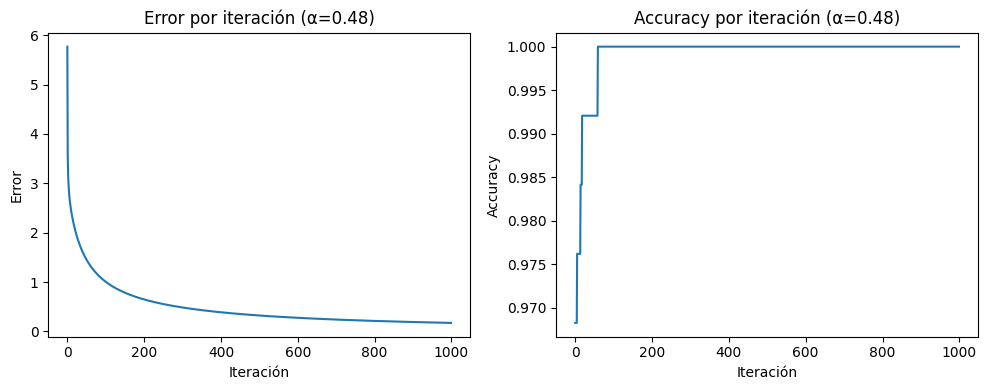

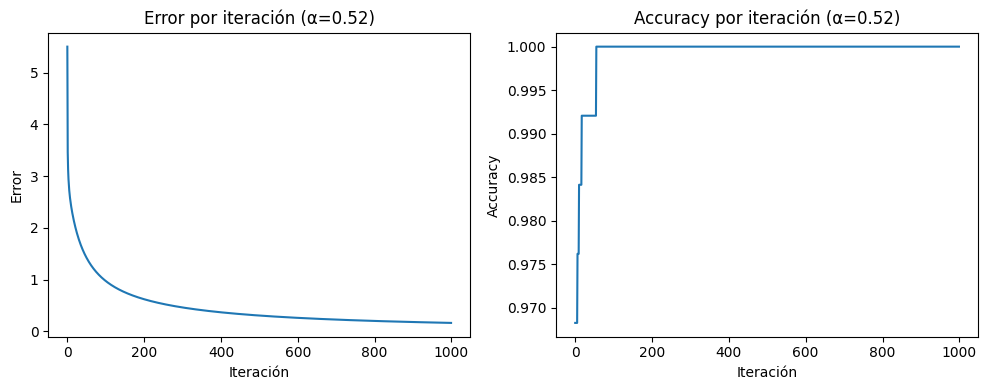

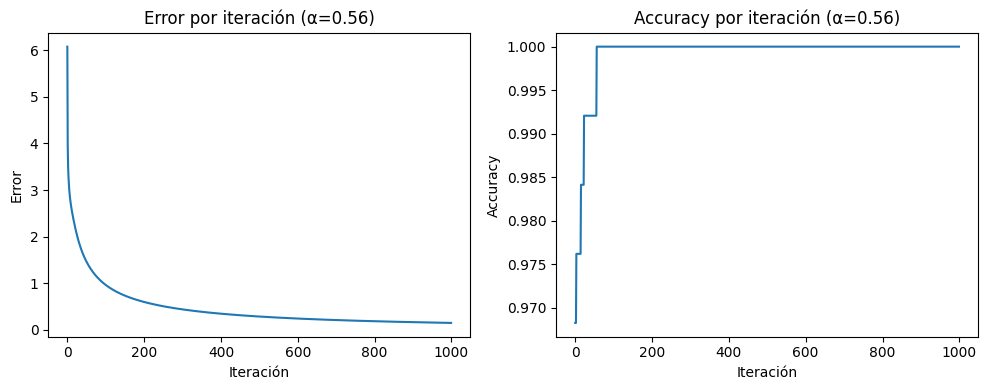

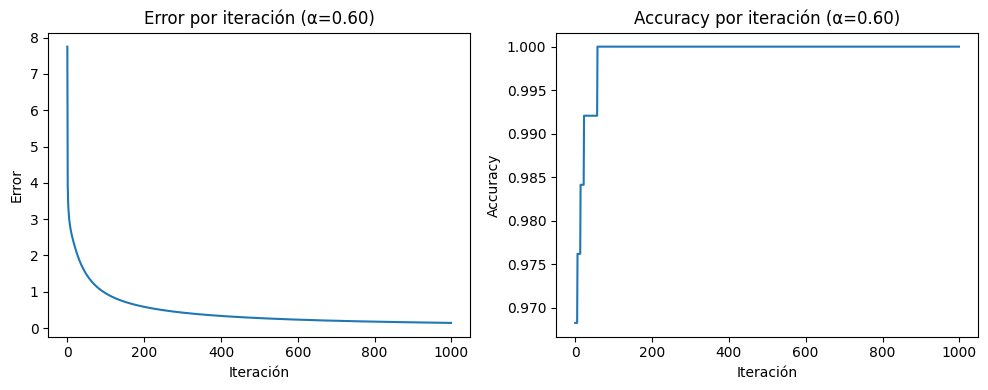

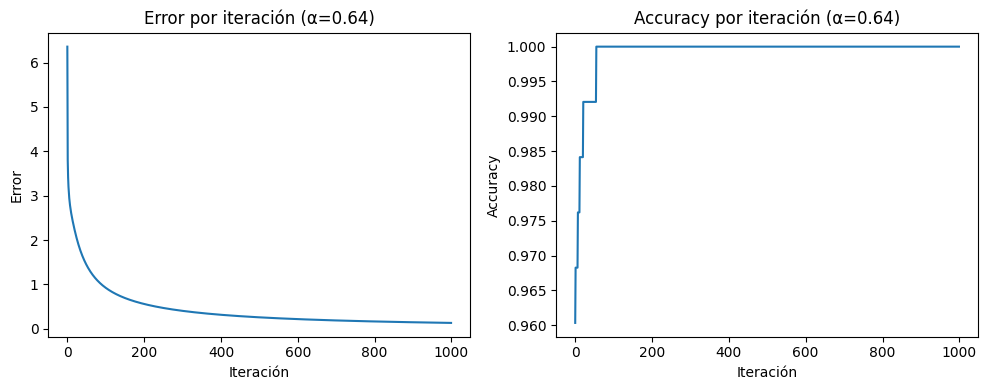

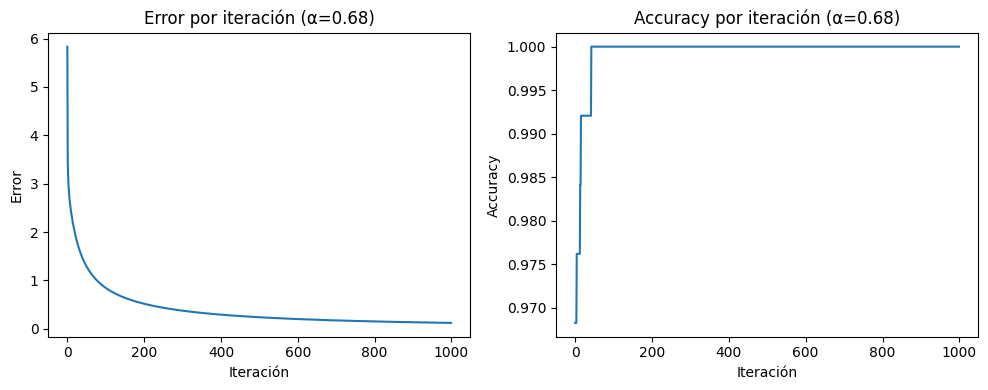

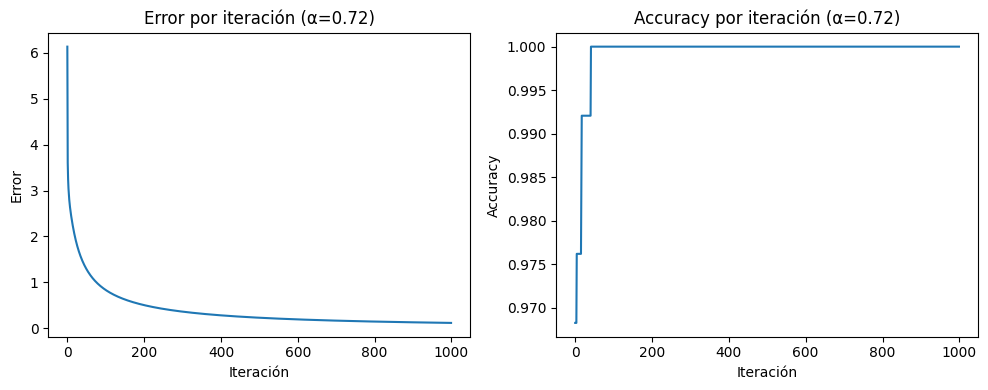

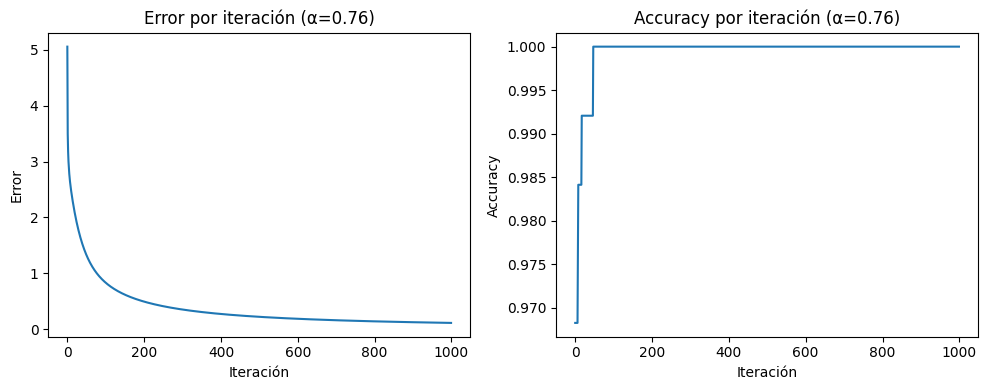

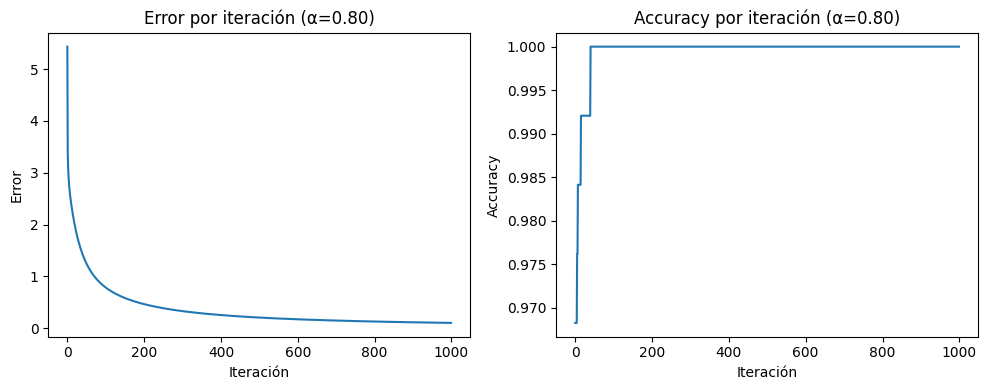

In [2]:
import matplotlib.pyplot as plt

results = []

alphas = np.arange(0.04, 0.84, 0.04)
for alpha in alphas:
  ng = NeuronaGradiente(
        alpha=alpha,
        n_iter=1000,
        FUN='sigmoid',
        # otros parámetros si los necesitas...
  )
  ng.fit(X_train, T_train)
  error_curve = ng.errors_
  acc_curve = ng.accuracy_
  total_iters = len(error_curve)
  iter_100_acc = next((i for i, acc in enumerate(acc_curve) if acc == 1.0), None)
  results.append({
    'alpha': alpha,
    'error_curve': error_curve,
    'acc_curve': acc_curve,
    'total_iters': total_iters,
    'iter_100_acc': iter_100_acc
  })

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(error_curve)
  plt.title(f'Error por iteración (α={alpha:.2f})')
  plt.xlabel('Iteración')
  plt.ylabel('Error')
  plt.subplot(1,2,2)
  plt.plot(acc_curve)
  plt.title(f'Accuracy por iteración (α={alpha:.2f})')
  plt.xlabel('Iteración')
  plt.ylabel('Accuracy')
  plt.tight_layout()
  plt.show()

# for res in results:
#   print(f"α={res['alpha']:.2f} | Iteraciones: {res['total_iters']} | Iteración 100% accuracy: {res['iter_100_acc']}")

## Inciso b
Repita el punto a) con tangente hiperbólica.

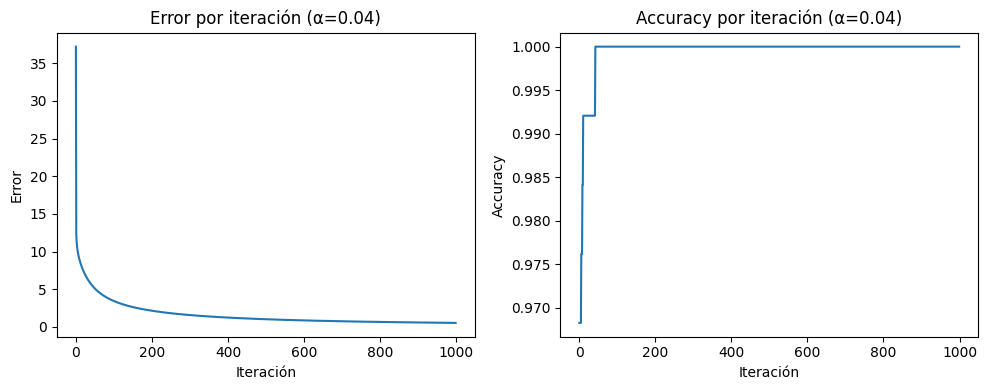

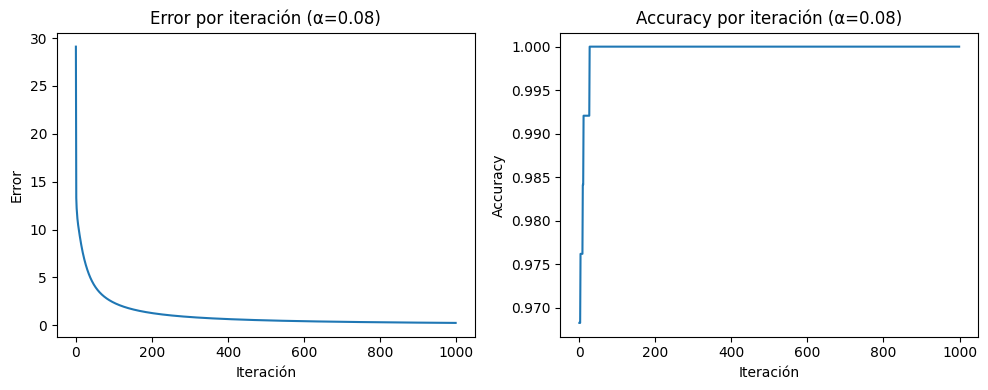

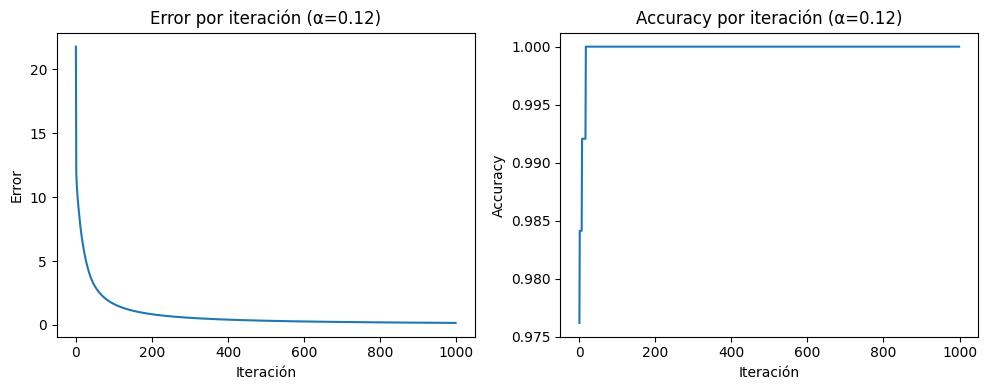

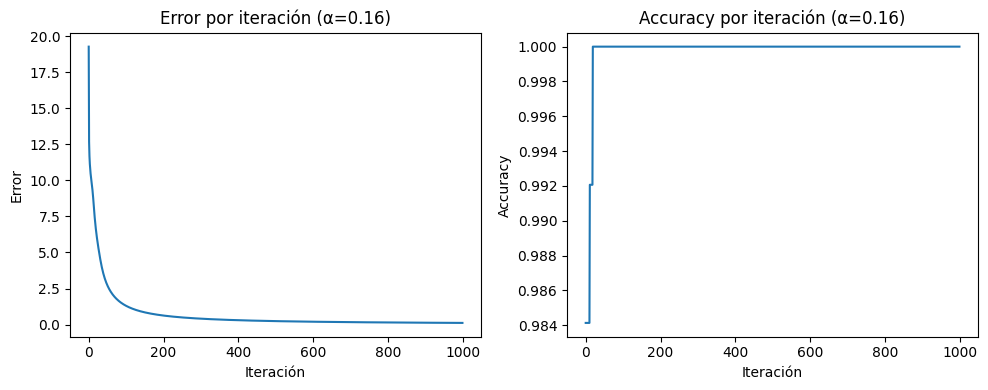

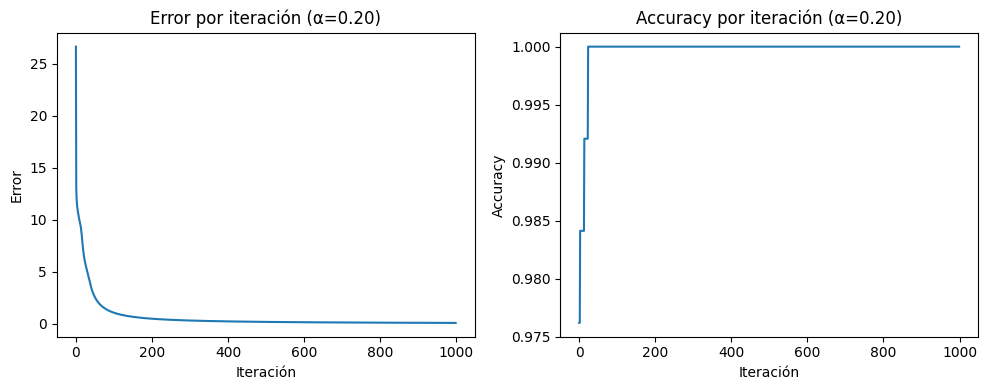

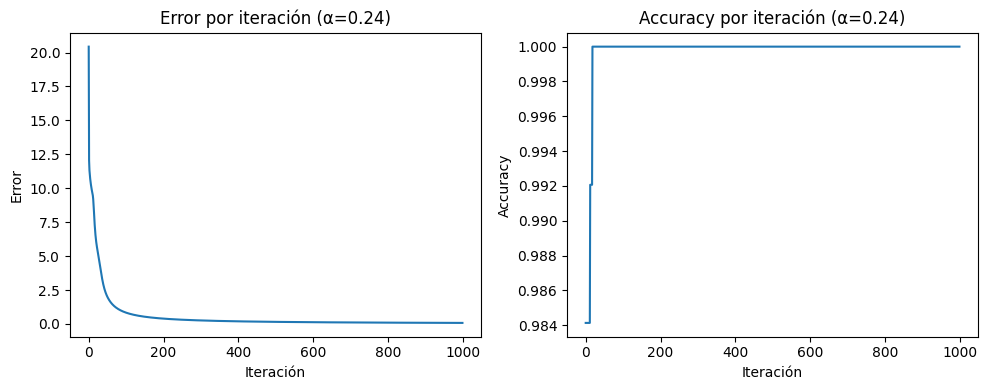

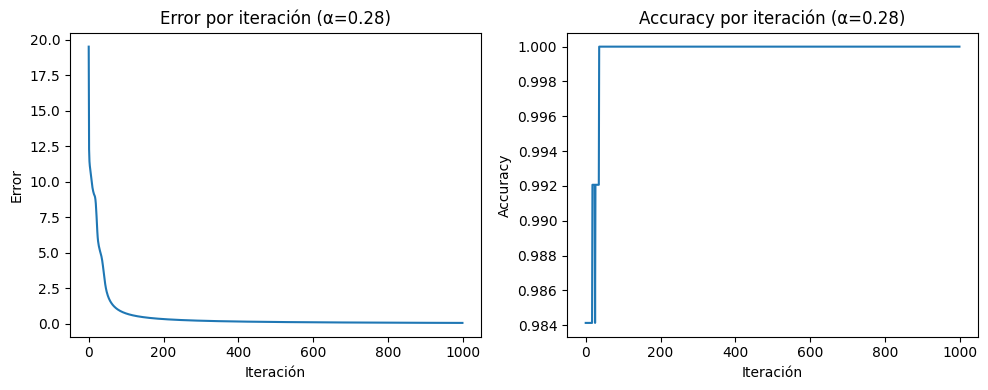

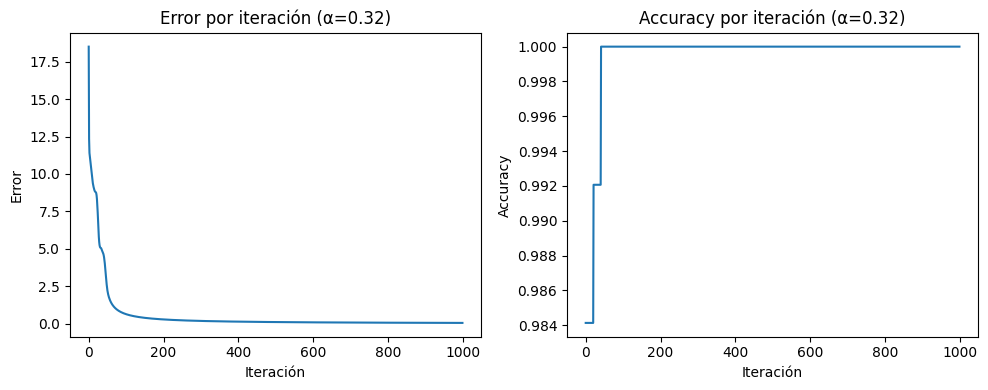

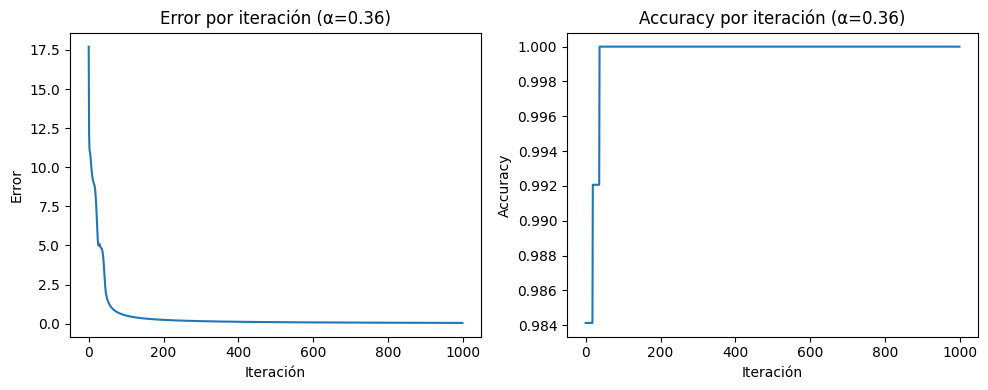

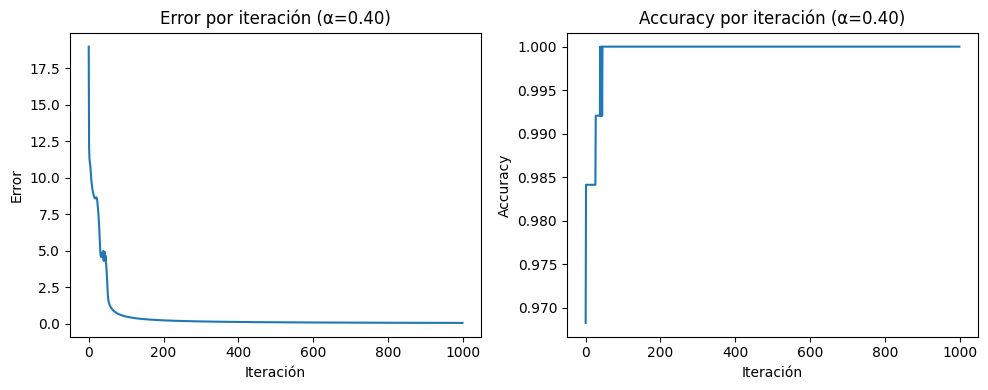

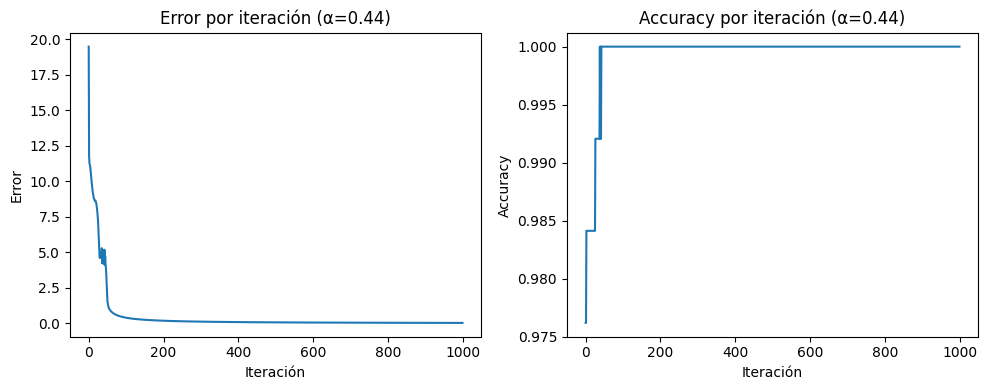

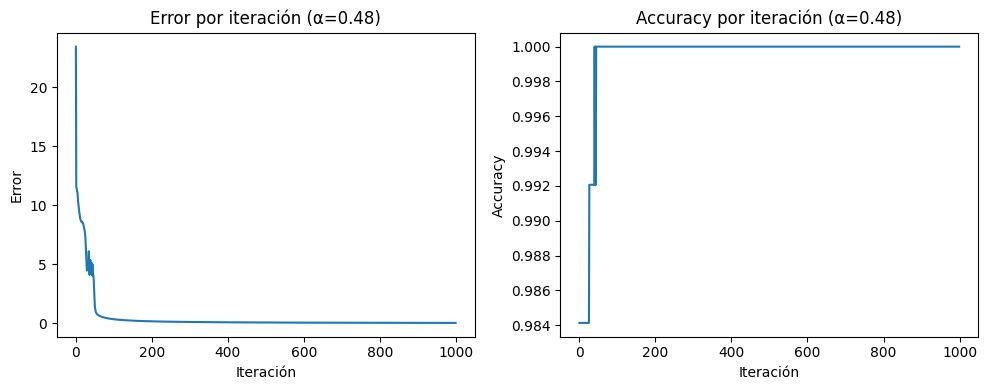

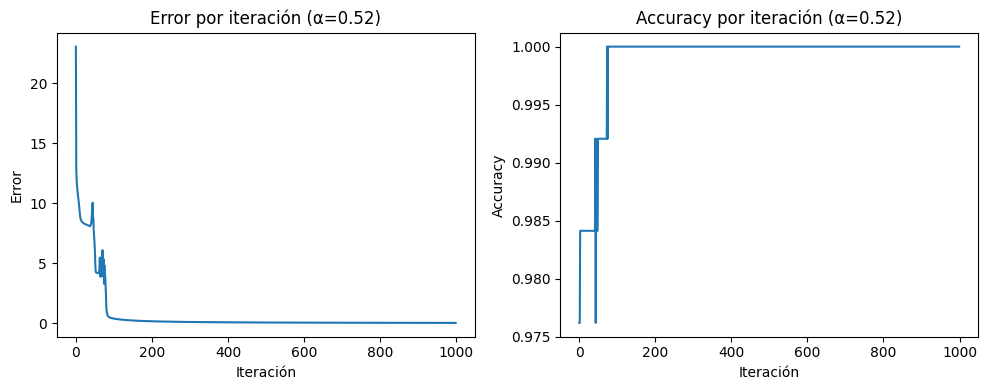

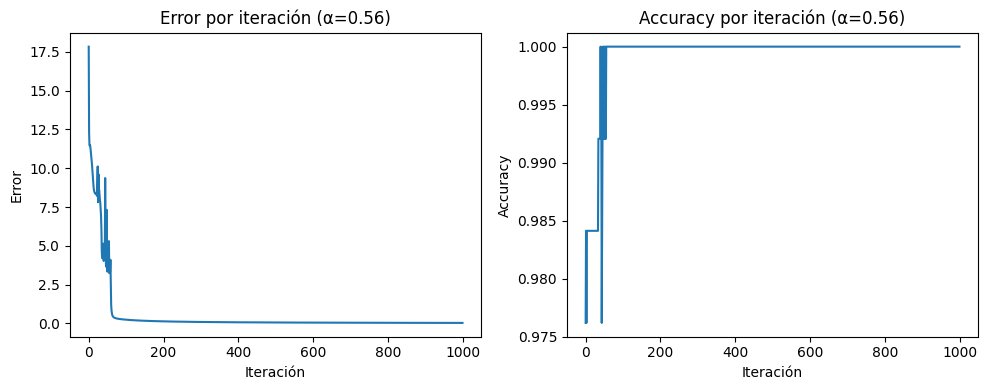

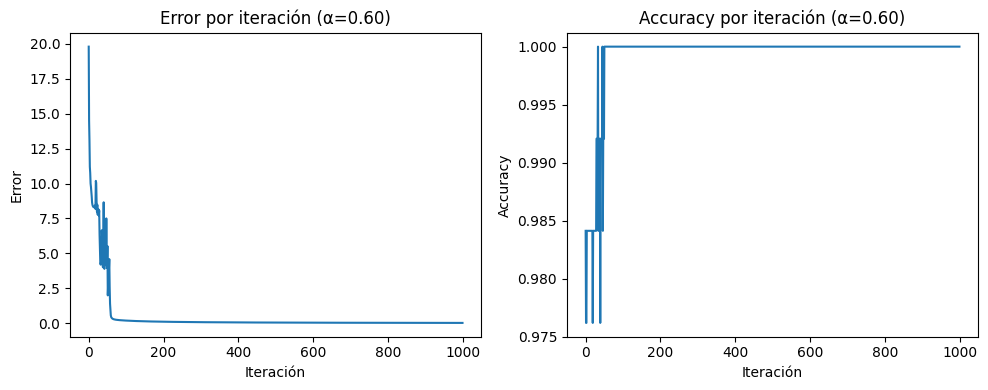

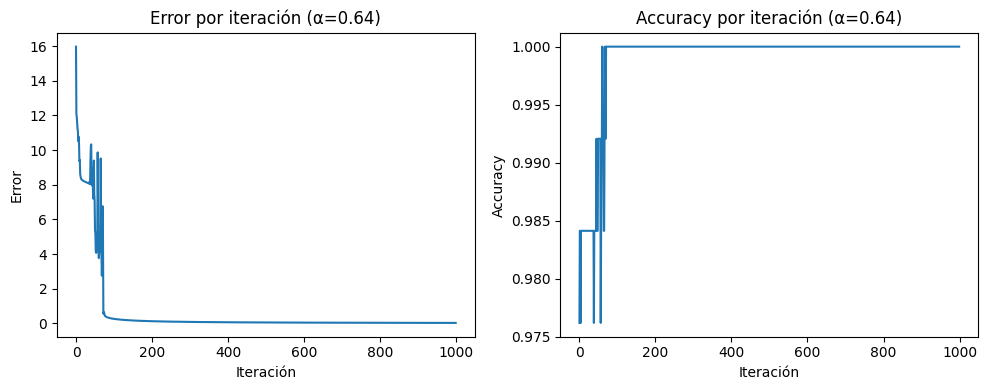

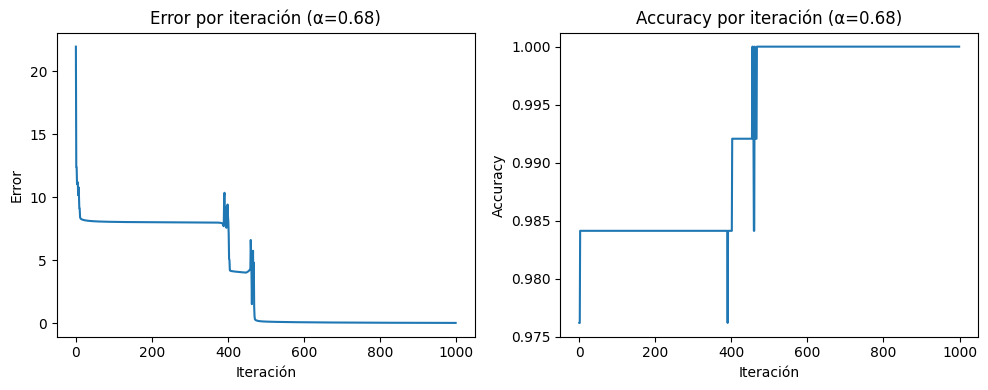

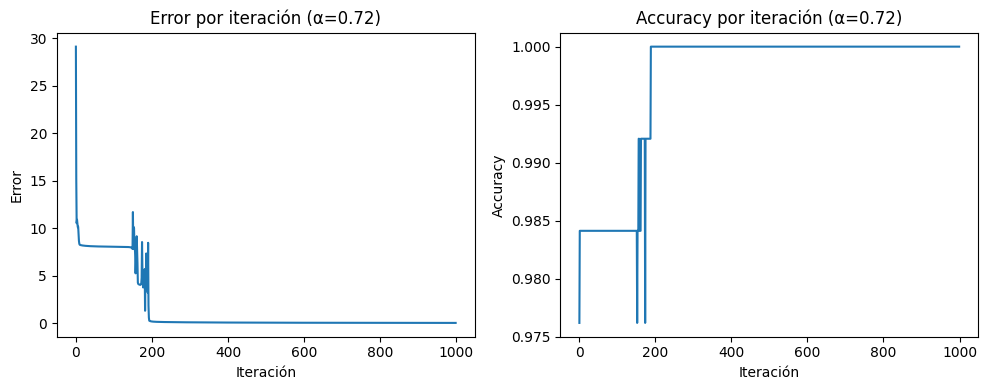

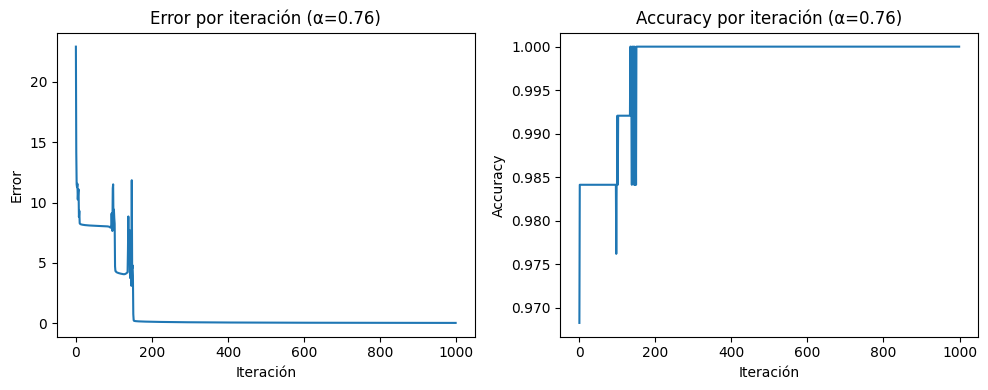

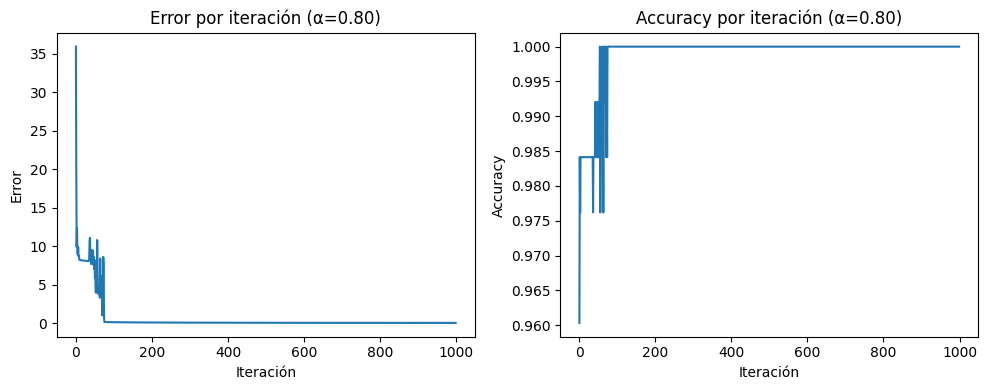

In [3]:
results = []

T_train = np.where(T_train == 0, -1, 1)
T_test = np.where(T_test == 0, -1, 1)

alphas = np.arange(0.04, 0.84, 0.04)
for alpha in alphas:
  ng = NeuronaGradiente(
        alpha=alpha,
        n_iter=1000,
        FUN='tanh',
        # otros parámetros si los necesitas...
  )
  ng.fit(X_train, T_train)
  error_curve = ng.errors_
  acc_curve = ng.accuracy_
  total_iters = len(error_curve)
  iter_100_acc = next((i for i, acc in enumerate(acc_curve) if acc == 1.0), None)
  results.append({
    'alpha': alpha,
    'error_curve': error_curve,
    'acc_curve': acc_curve,
    'total_iters': total_iters,
    'iter_100_acc': iter_100_acc
  })

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(error_curve)
  plt.title(f'Error por iteración (α={alpha:.2f})')
  plt.xlabel('Iteración')
  plt.ylabel('Error')
  plt.subplot(1,2,2)
  plt.plot(acc_curve)
  plt.title(f'Accuracy por iteración (α={alpha:.2f})')
  plt.xlabel('Iteración')
  plt.ylabel('Accuracy')
  plt.tight_layout()
  plt.show()

## Inciso c
Compare y analice los resultados obtenidos en a) y b).

---

Se puede ver cómo al hacerlo con la función sigmoide, la puntería incrementa de manera estable hasta llegar al 100%, mientras que la tangente hiperbólica llega al 100% más rápido, pero en las primeras iteraciones es inestable.

# Ejercicio 9

Se ha realizado un análisis químico a tres tipos distintos de vinos producidos en una misma región de Italia.
El número de muestras considerado es el siguiente:

- Tipo 1 ➔ 59 muestras
- Tipo 2 ➔ 71 muestras
- Tipo 3 ➔ 48 muestras
  
El archivo `vinos.csv` permite observar los resultados de este análisis. Cada fila representa una muestra
distinta y está formada, en primer lugar, por el número del tipo al cual pertenece el vino analizado seguido
por los 13 atributos que lo caracterizan.

Por ejemplo, la siguiente fila:

2, 12.29, 3.17, 2.21, 18, 88, 2.85, 2.99, 0.45, 2.81, 2.3, 1.42, 2.83, 406

Es el resultado del análisis de un vino correspondiente al tipo 2 (1er. valor de la fila) seguido por 13 valores
separados por comas que indican los niveles de las mediciones realizadas a dicho vino.

## Inciso a

Entrene una red neuronal formada por una única neurona para clasificar los vinos de Tipo 1.

Realice 30 ejecuciones independientes utilizando el 50%, 60%, 70%, 80% y 90% de los ejemplos como entrenamiento y el resto como testeo. Para cada porcentaje, indique la cantidad promedio de ejemplos correctamente clasificados en entrenamiento y en testeo. Calcule también el promedio y el desvío de la
cantidad de iteraciones realizadas.

Utilice un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3.

Analice los resultados obtenidos utilizando:
- Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio)
- Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria)
- Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)

In [9]:
def ejecutar_experimentos(X, T, train_fracs, alphas, n_runs, FUN, COSTO):
  resultados = []
  for train_frac in train_fracs:
    for alpha in alphas:
      res_alpha = []
      for run in range(n_runs):
        idx = np.random.permutation(len(X))
        n_train = int(train_frac * len(X))
        train_idx, test_idx = idx[:n_train], idx[n_train:]
        X_train, T_train = X[train_idx], T[train_idx]
        X_test, T_test = X[test_idx], T[test_idx]

        neurona = NeuronaGradiente(
          alpha=alpha, n_iter=400, FUN=FUN, COSTO=COSTO
        )
        neurona.fit(X_train, T_train)

        y_train_pred = (neurona.predict(X_train) > 0.5).astype(int)
        y_test_pred = (neurona.predict(X_test) > 0.5).astype(int)

        acc_train = np.mean(y_train_pred == T_train)
        acc_test = np.mean(y_test_pred == T_test)
        res_alpha.append({
          'acc_train': acc_train,
          'acc_test': acc_test,
          'iters': len(neurona.errors_)
        })
      resultados.append({
        'train_frac': train_frac,
        'alpha': alpha,
        'resultados': res_alpha
      })
  return resultados


data=pd.read_csv(DATA_PATH+'Vinos.csv', sep=';')

alphas=[0.1, 0.2, 0.3]
train_fracs=[0.5,0.6,0.7,0.8,0.9]

# Crear columna binaria: 1 si es Tipo 1, 0 si no
data['Tipo1'] = (data.iloc[:, 0] == 1).astype(int)

# Normalizar atributos numéricos (las 13 columnas siguientes)
scaler = StandardScaler()
X = np.array(scaler.fit_transform(data.iloc[:, 1:14]))
T = np.array(data['Tipo1'].values)

# Ejecuta los experimentos
resultados = ejecutar_experimentos(X, T, train_fracs, alphas, 30, FUN='sigmoid', COSTO='ECM')

# Mostrar resultados agrupados por train_frac y alpha
for train_frac in train_fracs:
    for alpha in alphas:
        # Filtra los resultados para este train_frac y alpha
        res = [r for r in resultados if r['train_frac'] == train_frac and r['alpha'] == alpha][0]['resultados']
        acc_train = [x['acc_train'] for x in res]
        acc_test = [x['acc_test'] for x in res]
        iters = [x['iters'] for x in res]
        print(f"\nPorcentaje entrenamiento: {int(train_frac*100)}% | Alpha: {alpha}")
        print(f"Promedio aciertos entrenamiento: {np.mean(acc_train):.2f} ± {np.std(acc_train):.2f}")
        print(f"Promedio aciertos testeo: {np.mean(acc_test):.2f} ± {np.std(acc_test):.2f}")
        print(f"Promedio iteraciones: {np.mean(iters):.2f} ± {np.std(iters):.2f}")




Porcentaje entrenamiento: 50% | Alpha: 0.1
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 50% | Alpha: 0.2
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.98 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 50% | Alpha: 0.3
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.98 ± 0.02
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.1
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.98 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.2
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.02
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.3
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.02
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamie

In [10]:
resultados = ejecutar_experimentos(X, T, train_fracs, alphas, 30, FUN='sigmoid', COSTO='EC_binaria')

# Mostrar resultados agrupados por train_frac y alpha
for train_frac in train_fracs:
    for alpha in alphas:
        # Filtra los resultados para este train_frac y alpha
        res = [r for r in resultados if r['train_frac'] == train_frac and r['alpha'] == alpha][0]['resultados']
        acc_train = [x['acc_train'] for x in res]
        acc_test = [x['acc_test'] for x in res]
        iters = [x['iters'] for x in res]
        print(f"\nPorcentaje entrenamiento: {int(train_frac*100)}% | Alpha: {alpha}")
        print(f"Promedio aciertos entrenamiento: {np.mean(acc_train):.2f} ± {np.std(acc_train):.2f}")
        print(f"Promedio aciertos testeo: {np.mean(acc_test):.2f} ± {np.std(acc_test):.2f}")
        print(f"Promedio iteraciones: {np.mean(iters):.2f} ± {np.std(iters):.2f}")



Porcentaje entrenamiento: 50% | Alpha: 0.1
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 50% | Alpha: 0.2
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 50% | Alpha: 0.3
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.1
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.2
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.3
Promedio aciertos entrenamiento: 1.00 ± 0.00
Promedio aciertos testeo: 0.99 ± 0.01
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamie

In [11]:
resultados = ejecutar_experimentos(X, T, train_fracs, alphas, 30, FUN='tanh', COSTO='ECM')

# Mostrar resultados agrupados por train_frac y alpha
for train_frac in train_fracs:
    for alpha in alphas:
        # Filtra los resultados para este train_frac y alpha
        res = [r for r in resultados if r['train_frac'] == train_frac and r['alpha'] == alpha][0]['resultados']
        acc_train = [x['acc_train'] for x in res]
        acc_test = [x['acc_test'] for x in res]
        iters = [x['iters'] for x in res]
        print(f"\nPorcentaje entrenamiento: {int(train_frac*100)}% | Alpha: {alpha}")
        print(f"Promedio aciertos entrenamiento: {np.mean(acc_train):.2f} ± {np.std(acc_train):.2f}")
        print(f"Promedio aciertos testeo: {np.mean(acc_test):.2f} ± {np.std(acc_test):.2f}")
        print(f"Promedio iteraciones: {np.mean(iters):.2f} ± {np.std(iters):.2f}")



Porcentaje entrenamiento: 50% | Alpha: 0.1
Promedio aciertos entrenamiento: 0.63 ± 0.10
Promedio aciertos testeo: 0.64 ± 0.10
Promedio iteraciones: 31.10 ± 15.98

Porcentaje entrenamiento: 50% | Alpha: 0.2
Promedio aciertos entrenamiento: 0.64 ± 0.12
Promedio aciertos testeo: 0.65 ± 0.10
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 50% | Alpha: 0.3
Promedio aciertos entrenamiento: 0.65 ± 0.15
Promedio aciertos testeo: 0.64 ± 0.15
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.1
Promedio aciertos entrenamiento: 0.65 ± 0.09
Promedio aciertos testeo: 0.63 ± 0.10
Promedio iteraciones: 23.90 ± 5.89

Porcentaje entrenamiento: 60% | Alpha: 0.2
Promedio aciertos entrenamiento: 0.63 ± 0.12
Promedio aciertos testeo: 0.61 ± 0.14
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamiento: 60% | Alpha: 0.3
Promedio aciertos entrenamiento: 0.65 ± 0.10
Promedio aciertos testeo: 0.64 ± 0.10
Promedio iteraciones: 400.00 ± 0.00

Porcentaje entrenamien

# Ejercicio 10

A partir de los ejemplos del archivo automobile-simple.csv, utilice todos los ejemplos para generar un modelo de 1 neurona para clasificar si un auto es ecológico:

## Inciso a
Elimine los registros que presenten valores faltantes y utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es ecológico o no. Considere que un auto es ecológico si el valor de "eco-rating" supera la media de dicho atributo.

In [6]:
data=pd.read_csv(DATA_PATH+'automobile-simple.csv')

data = data.dropna()

T = (data["eco-rating"] > data["eco-rating"].mean()).astype(int)

numeric_cols = ["curb-weight", "engine-size", "horsepower", 
                "city-mpg", "highway-mpg", "price", 
                "volume"]

X = data[numeric_cols]
X["fuel-type-diesel"] = data["fuel-type"].replace({"gas":0, "diesel":1}).to_frame()
# X["four-num-of-doors"] = data["num-of-doors"].replace({"two":0, "four":1}).to_frame()

X = X.to_numpy()

/tmp/ipykernel_69958/761832363.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["fuel-type-diesel"] = data["fuel-type"].replace({"gas":0, "diesel":1}).to_frame()
/tmp/ipykernel_69958/761832363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["fuel-type-diesel"] = data["fuel-type"].replace({"gas":0, "diesel":1}).to_frame()


## Inciso b
Luego de completar según lo indicado en a), aplique normalización y realice el entrenamiento utilizando los atributos numéricos:

- Utilizando salida sigmoide (sigmoid) para la neurona.
- Utilizando salida tangente hiperbólico (tanh) para la neurona.

In [9]:
# Seleccionar solo las columnas numéricas del DataFrame 'data'
numeric = data.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
data[numeric] = scaler.fit_transform(data[numeric])

# X: atributos numéricos excepto la columna objetivo
X = data[numeric].drop(columns=['eco-rating']).values


X=np.array(X)
T=np.array(T)

ALPHA = 0.05
MAX_ITER = 1000
COTA = 10e-6
# Entrenamiento con función de activación sigmoide
ng = NeuronaGradiente(alpha=ALPHA, n_iter=MAX_ITER, cotaE=COTA, FUN='sigmoid')
print("Exactitud (sigmoid): ", ng.fit(X, T).accuracy_[-1])
# Entrenamiento con función de activación tangente hiperbólica
ng = NeuronaGradiente(alpha=ALPHA, n_iter=MAX_ITER, cotaE=COTA, FUN='tanh')
T_tanh = pd.Series(np.where(data["eco-rating"] > data["eco-rating"].mean(), 1, -1))
print("Exactitud (tanh): ", ng.fit(X, T_tanh).accuracy_[-1])


Exactitud (sigmoid):  0.9949238578680203
Exactitud (tanh):  1.0
